In [12]:
import pandas as pd
import numpy as np


# Read data
resturaunts = pd.read_csv("restaurantInspections.csv")

resturaunts_pittsburgh = resturaunts[resturaunts["city"] == "Pittsburgh"]

# Retrieve the unique municipalities 
resturaunts_unique_districts = resturaunts_pittsburgh["municipal"].drop_duplicates()
print(resturaunts_unique_districts)

#for():
    

14         Pittsburgh-127
27         Pittsburgh-101
40         Pittsburgh-107
55         Pittsburgh-102
80         Pittsburgh-124
               ...       
45783      North Braddock
46609             Oakmont
61734            Carnegie
75621                Pine
76946    Pittsburgh (All)
Name: municipal, Length: 95, dtype: object


In [44]:
# Extract all locations and inspections where the inspection result succeded
resturaunts_pittsburgh_pass = resturaunts_pittsburgh[resturaunts_pittsburgh["placard_desc"]=="Inspected & Permitted"]
resturaunts_pittsburgh_fail = resturaunts_pittsburgh[resturaunts_pittsburgh["placard_desc"]!="Inspected & Permitted"]

#Group it by municipality
rest_fail_group =  resturaunts_pittsburgh_fail.groupby(by="municipal")["placard_desc"]
rest_pass_group = resturaunts_pittsburgh_pass.groupby(by="municipal")["placard_desc"]
rest_total_group = resturaunts_pittsburgh.groupby(by="municipal")["placard_desc"]

#Calculate proportions of pass/fail by dividing pass counts by total counts
rest_proportions = rest_fail_group.count()/rest_total_group.count()



<AxesSubplot:xlabel='municipal'>

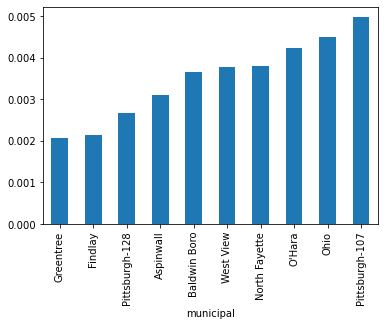

In [51]:
rest_proportions.nsmallest(10).plot.bar()